<a href="https://colab.research.google.com/github/marcin119a/PODSTAWY-UCZENIA-MASZYNOWEGO-W-PYTHONIE-/blob/main/Regresja_Liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja Liniowa

## Wprowadzenie
Zadanie klasyfikacji czy regresji polegają na dopasowaniu do otykietowanego zbioru danych $X, y$ funkcji, dla której z dostatecznie dużą dokładnością zachodzi $f_\theta(x) \approx y$ dla losowych $x, y$ z tego zbioru.

Żeby tego dokonać, uznajemy, że naszą funkcję $f_\theta$ daje się sparametryzować wagami $\theta$.

Żeby rozwiązać zadanie klasyfikacji, bądź regresji będziemy minimalizować (zazwyczaj gradientowo) ze względu na $\theta$ pewną funkcję celu $\mathcal{L}(x, y, \theta)$, błędu, lossu, zwał jak zwał.
Założenie jest takie, że mała wartość funkcji celu oznacza dobrą jakość modelu, która może być mierzona innymi metrykami: RMSE, MAE, accuracy, precision, recall, itd. Dobór odpowieniej funkcji celu należy do zadania inżyniera, który zajmuje się uczeniem maszynowym, dobór metryk również, ale jest już bliżej "biznesu". 

Przykładowy schemat wygląda następująco:
0. Do problemu dobierz architekturę modelu, parametryzowaną wagami $\theta$, funkcję błędu $\mathcal{L}(x, y, \theta)$, której niska oczekiwana wartość dla danych wag gwarantuje dobrą jakość modelu
1. Niech $X$ to dane wejściowe, $y$ to etykiety
2. Zainicjalizuj parametry modelu $\theta$
3. Powtarzaj dopóki $\mathcal{L}(\theta)$ nie będzie wystarczająco niska
  * Minimalizuj $\mathcal{L}(\theta)$ zmieniając wagi $\theta$
    * zazwyczaj powyższa minimalizacja oparta jest na gradiencie

Algorytm regresji liniowej zakłada:
$$f_\theta(x) = \theta^T x$$
$$\mathcal{L}(x, y, \theta) = (f_\theta(x) - y)^2$$

Algorytm regresji logistcznej zakłada:
$$f_\theta(x) = \frac{1}{1 + e^-{\theta^T x}}$$
$$\mathcal{L}(x, y, \theta) = H(f_\theta(x), y)$$

Algorytm regresji logistcznej z wieloma klasami (softmax regression/multinomal regression) zakłada:
$$f_\theta(x) = \frac{1}{1 + e^-{\theta^T x}}$$
$$\mathcal{L}(x, y, \theta) = H(f_\theta(x), y)$$

gdzie:
$H(p,q) = -\sum_{i=1}^np(x_i)\log {q(x_i)} = -\sum_{i=1}^np(x_i)\log {p(x_i)}-\sum_{i=1}^np(x_i)\log {\frac{q(x_i)}{p(x_i)}}$

Gradienty funkcji błędu w scenariuszu mamy już policzone, można się nimi nie przejmować.
W dalszej części kursu i tak zajmie się nimi framework pytorch.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Rozpoczynamy od preparowanego zbioru danych, który da się przybliżyć dobrze funkcją liniową.

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

Zwizualizujmy nasz zbiór danych:

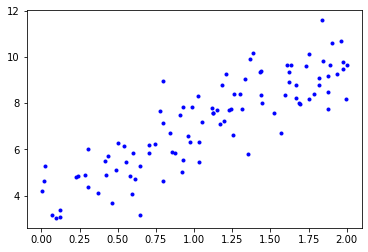

In [ ]:
plt.plot(X, y, "b.")
plt.show()
y = y[:, 0]

Zaimplementujmy wyznaczania współczynników regresji liniowej za pomocą algorytmu spadku gradientu, minimazując błąd średniokwadratowy pomiędzy przewidywaniami naszego modelu, a wartościami prawdziwymi.  

In [ ]:
def rmse(X, y, theta):
    return np.sqrt(np.mean((X @ theta - y) ** 2))

def linear_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based linear regression on the input data.
    
    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.
    
    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    losses (list): values of loss function being optimized after each optimization step
    """
    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize parameters to zeros
    theta = np.zeros(X.shape[1])
    losses = []

    def prediction(X, theta):
      # Compute predictions
      y_pred = X @ theta
      return y_pred

    def gradient(X, theta):
      y_pred = prediction(X, theta)
      # Compute errors
      errors = y_pred - y
      # Compute gradients
      gradients = X.T @ errors / len(X)
      return gradients

    # Perform gradient descent
    for i in range(num_iterations):
        # Update parameters
        theta -= learning_rate * gradient(X, theta)

        cost = rmse(X, y, theta)
        losses.append(cost)

        if i % logging_period == 0:
          print(f"RMSE after iteration {i}: {cost}")
        
    return theta, losses

Uruchommy nasz algorytm spadku gradientowego rozwiązujący zadanie regresji liniowej:

RMSE after iteration 0: 7.271707675111863
RMSE after iteration 100: 1.2429966410558813
RMSE after iteration 200: 1.055940964783732
RMSE after iteration 300: 1.0434430783712554
RMSE after iteration 400: 1.0349652783447179
RMSE after iteration 500: 1.0284762432539543
RMSE after iteration 600: 1.023510982732734
RMSE after iteration 700: 1.01971651923992
RMSE after iteration 800: 1.0168196729980163
RMSE after iteration 900: 1.0146098051666386


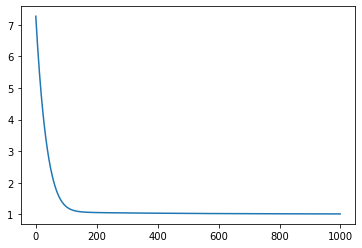

In [ ]:
theta, losses = linear_regression_gd(X, y)
plt.plot(losses)
plt.show()

Zwizualizujmy znalezioną prostą:

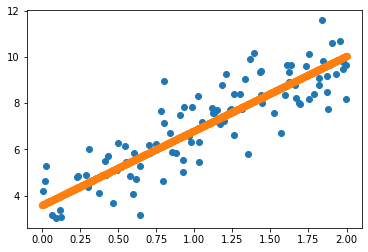

In [ ]:
xs = np.linspace(0, 2, 1000)
plt.scatter(X[:, 0], y)
plt.scatter(xs, theta[0] + xs * theta[1])
plt.show()

# Regresja liniowa/wielomianowa – feature engineering
Dzięki technice inżynierii cech (feature engineering), polegającej na przekształceniu danych wejściowych w sposób dobrze dobrany do konkretnego problemu regresji, jesteśmy w stanie z dodatkową wiedzą ekspercką rozwiązać problemy regresji nieliniowej.

Zobaczmy to na przykładzie syntetycznego zbioru danych, który dobrze daje się przybliżyć wielomianem 3-go stopnia.

Na początku, wygenerujmy i zwizualizujmy nasz zbiór danych:

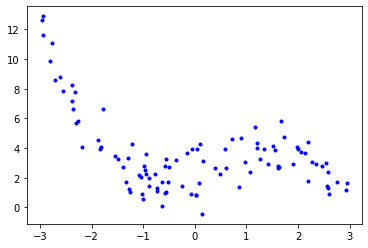

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 - X**3/3 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y, "b.")
plt.show()

y = y[:, 0]

Teraz, przekształćmy przestrzeń cech naszego problemu, żeby znalezienie dobrego modelu liniowego w tej przekształconej przestrzeni było już prostym zadaniem:

In [ ]:
X = np.concatenate([X, X**2, X**3], axis=1)

Zapuśćmy dokładnie ten sam co wcześniej algorytm rozwiązujący problem regresji liniowej, ale na przekształconej przez nas przestrzeni cech: 

RMSE after iteration 0: 3.5381759740107133
RMSE after iteration 100: 1.444591289290609
RMSE after iteration 200: 1.2306193182709848
RMSE after iteration 300: 1.1226787737634336
RMSE after iteration 400: 1.07101825432535
RMSE after iteration 500: 1.0470468846612841
RMSE after iteration 600: 1.0360915275188092
RMSE after iteration 700: 1.0311168465641927
RMSE after iteration 800: 1.0288629716286257
RMSE after iteration 900: 1.0278422551832058


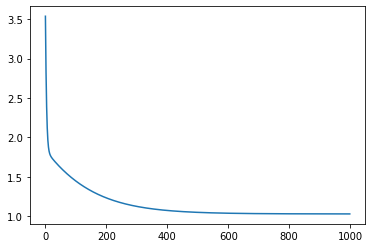

In [ ]:
theta, losses = linear_regression_gd(X, y)
plt.plot(losses)
plt.show()

Zwizualizujmy dopasowanie naszego modelu:

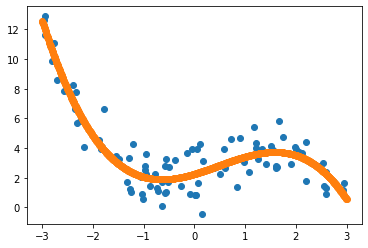

In [ ]:
xs = np.linspace(-3, 3, 1000)
plt.scatter(X[:, 0], y)
plt.scatter(xs, theta[0] + xs * theta[1] + theta[2] * xs ** 2 + theta[3] * xs ** 3)
plt.show()

# Regresja liniowa – realny przykład
Spróbujmy zastosować nasz algorytm do rozwiązania rzeczywistego problemu.
Spróbujemy na podstawie danych dotyczących zamówienia w danej restauracji za pomocą modelu liniowego przewidzieć napiwek.

In [ ]:
tips_df = pd.read_csv('https://raw.githubusercontent.com/marcin119a/PODSTAWY-UCZENIA-MASZYNOWEGO-W-PYTHONIE-/main/tips.csv')
tips_df.head()

,index_of_row,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


Obróbmy najpierw nasz zbiór danych:
* przeróbmy zmienne kategoryczne na zmienne numeryczne za pomocą techniki one-hot encoding
* znormalizujmy nasz zbiór danych, żeby każda kolumna miała średnią wartość 0 i odchylenie standardowe 1
* Podzielmy nasz zbiór danych na:
  * zbiór treningowy: na którym będziemy uczyć nasz model
  * zbiór testowy: na którym będziemy sprawdzać jakość naszego modelu

In [ ]:
# Create dummy variables for the 'day' and 'time' columns, as they are categorical and can be represented as binary variables
sex_dummies = pd.get_dummies(tips_df['sex'], prefix='sex')
smoker_dummies = pd.get_dummies(tips_df['smoker'], prefix='smoker')
day_dummies = pd.get_dummies(tips_df['day'], prefix='day')
time_dummies = pd.get_dummies(tips_df['time'], prefix='time')
tips_df = pd.concat([tips_df, day_dummies, time_dummies, sex_dummies, smoker_dummies], axis=1)
tips_df.drop(['day', 'time', 'sex', 'smoker', 'index_of_row', 'sex_Female', 'smoker_No'], axis=1, inplace=True)

# Split the dataset into training and testing sets
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

# Shuffle the data
shuffle_idx = np.random.permutation(len(X))
X = X.iloc[shuffle_idx, :]
y = y.iloc[shuffle_idx]

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Scale the features manually
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Convert it to numpy
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

Zapuśćmy algorytm rozwiązywania regresji liniowej na problemie przewidywania napiwków:

RMSE after iteration 0: 3.2351393590394966
RMSE after iteration 100: 2.9479238888989414
RMSE after iteration 200: 2.694490383955409
RMSE after iteration 300: 2.4708501518792345
RMSE after iteration 400: 2.273694016919688
RMSE after iteration 500: 2.1002014271143494
RMSE after iteration 600: 1.9479152008915948
RMSE after iteration 700: 1.8146563965765836
RMSE after iteration 800: 1.6984647870573208
RMSE after iteration 900: 1.5975566973068178
RMSE after iteration 1000: 1.5102954262747277
RMSE after iteration 1100: 1.435171259336829
RMSE after iteration 1200: 1.3707888826028125
RMSE after iteration 1300: 1.3158603002000664
RMSE after iteration 1400: 1.2692014519310868
RMSE after iteration 1500: 1.2297308403666476
RMSE after iteration 1600: 1.196468705715728
RMSE after iteration 1700: 1.1685356416640194
RMSE after iteration 1800: 1.1451499695630665
RMSE after iteration 1900: 1.1256236021638495
RMSE after iteration 2000: 1.109356464213503
RMSE after iteration 2100: 1.0958297603110232
RMSE 

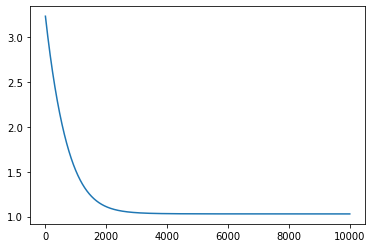

In [ ]:
theta, losses = linear_regression_gd(X_train, y_train, learning_rate=0.001, num_iterations=10000)
plt.plot(losses)
plt.show()

Możemy łatwo zinterpretować współczynniki naszej regresji liniowej jako wpływ każdej zmiennej na wynik – napiwek.

Możemy zobaczyć, że:
* Największy wpływ na napiwek ma kwota zamówienia
* Potem ile osób było przy stole
* Czy był to piątek
* Reszta atrybutów ma znikomy efekt

Co zgadza się z naszą intuicją

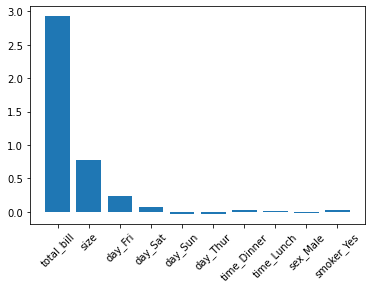

In [ ]:
import matplotlib.pyplot as plt
plt.bar(list(X.columns), theta[:-1])
plt.xticks(rotation=45)
plt.show()

# Regresja logistyczna
W podobny sposób co poprzednio, normalizując wyjścia z modelu liniowego za pomocą funkcji sigmoid $\frac{1}{1 + e^{-x}}$ jesteśmy w stanie rozwiązywać problem klasyfikacji binarnej z użyciem modelu liniowego, aka. regresji logistycznej.

Spróbujmy najpierw rozwiązać problem klasyfikacji na dwie klasy za pomocą prostego syntetycznego zbioru:

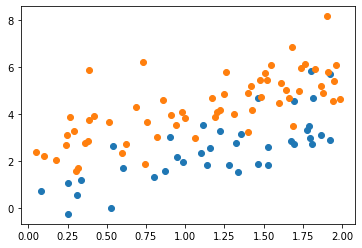

In [ ]:
y = np.random.randint(0, 2, size=100)
xs = 2 * np.random.rand(100,1)
X = np.concatenate([xs, 1 + 2 * xs + np.random.randn(100,1) + (y.reshape(100, 1) * 2 - 1) * 1], axis=1)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

Zaimplementujmy algorytm regresji logistycznej, znów za pomocą algorytmu spadku gradientu minimalizując entropię skośną, która jest dobrą miarą odległości między rozkładami:

$H(p,q) = -\sum_{i=1}^np(x_i)\log {q(x_i)} = -\sum_{i=1}^np(x_i)\log {p(x_i)}-\sum_{i=1}^np(x_i)\log {\frac{q(x_i)}{p(x_i)}}$

predykcji naszego modelu liniowego z dodaną funkcją sigmoid normalizującą wyjścia naszego modelu do $[0; 1]$, które będziemy traktować jako prawdopodobieństwo klasy pierwszej, warunkowane wejściem, a prawdziwego rozkładu.

In [ ]:
def logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based logistic regression on the input data.
    
    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.
    
    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    losses (list): values of loss function being optimized after each optimization step
    """
    losses = []

    # Define the sigmoid function
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Define the cost function
    def cost_function(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        J = -(1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
        return J

    # Define the gradient function
    def gradient(theta, X, y):
        m = len(y)
        h = sigmoid(X.dot(theta))
        grad = (1/m) * X.T.dot(h-y)
        return grad

    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize parameters to zeros
    theta = np.zeros(X.shape[1])
    
    # Perform gradient descent
    for i in range(num_iterations):
        cost = cost_function(theta, X, y)
        losses.append(cost)
        grad = gradient(theta, X, y)
        theta = theta - learning_rate * grad
        if i % logging_period == 0:
            print(f"Cost after iteration {i}: {cost}")

    return theta, losses

Uruchommy nasz algorytm znajdowania modelu linowego dla zadania regresji logistycznej:

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5863928606004457
Cost after iteration 200: 0.5660092260009013
Cost after iteration 300: 0.5476896147868873
Cost after iteration 400: 0.5311698758624778
Cost after iteration 500: 0.5162491732581155
Cost after iteration 600: 0.5027476427363707
Cost after iteration 700: 0.49050543004181124
Cost after iteration 800: 0.4793812285595341
Cost after iteration 900: 0.4692505747949631
Cost after iteration 1000: 0.4600040811510053
Cost after iteration 1100: 0.45154571700232465
Cost after iteration 1200: 0.4437912013610591
Cost after iteration 1300: 0.4366665384228472
Cost after iteration 1400: 0.4301067067661197
Cost after iteration 1500: 0.4240545004919007
Cost after iteration 1600: 0.41845951351081
Cost after iteration 1700: 0.41327725461970616
Cost after iteration 1800: 0.4084683796534583
Cost after iteration 1900: 0.40399802696701076
Cost after iteration 2000: 0.39983524322188596
Cost after iteration 2100: 0.39595248755084

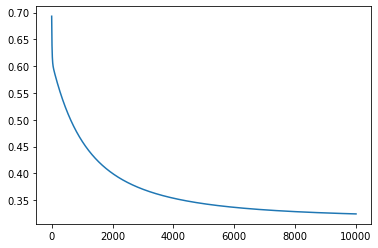

In [ ]:
theta, losses = logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=10000)
plt.plot(losses)
plt.show()

Zwizualizujmy predykcje naszego modelu:

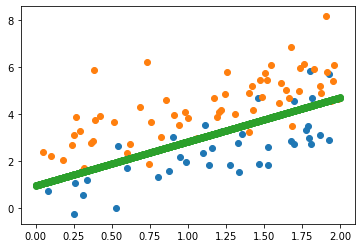

In [ ]:
xs = np.linspace(0, 2, 1000)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(xs, -(theta[0] + xs * theta[1])/theta[2])
plt.show()

Obliczmy dokładność naszego modelu – tj. stosunek dobrze sklasyfikowanych przykładów do wszystkich przykładów:

In [ ]:
"""
TODO:
your code goes here
"""

# Regresja logistyczna – feature engineering
Podobnie jak w zadaniu regresji liniowej, możemy rozwiązywać nieliniowe problemy klasyfikacji modyfikując wcześniej we właściwy sposób wejściową przestrzeń cech.

Zobaczmy jak to działa na prostym syntetycznym przykładzie zbióru dwóch klas, który da się odseparować elipsą:

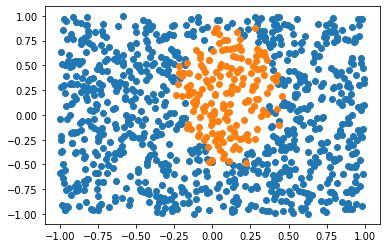

In [ ]:
X = np.random.uniform(-1, 1, (1000, 2))
y = (np.dot(np.array([2 **2, 1]).reshape(1, 2), ((X - np.array([0.1, 0.2])) ** 2).T) < 0.4 + np.random.randn(1000) * 0.1)[0].astype(int)

plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

We właściwy sposób dobierzmy przestrzeń cech:

In [ ]:
X = np.concatenate([X, X**2], axis=1)

Uruchommy nasz algorytm regresji logistycznej na przekształconej przestrzeni cech:

Cost after iteration 0: 0.6931471805599444
Cost after iteration 100: 0.2876268640697
Cost after iteration 200: 0.24398308238152572
Cost after iteration 300: 0.22051765965555
Cost after iteration 400: 0.20514645842670434
Cost after iteration 500: 0.19395625458810867
Cost after iteration 600: 0.18526572131231608
Cost after iteration 700: 0.17821813941188772
Cost after iteration 800: 0.17232426095868067
Cost after iteration 900: 0.16728094643941518


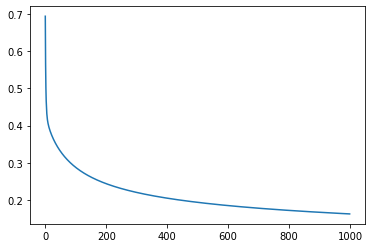

In [ ]:
theta, losses = logistic_regression_gd(X, y, learning_rate=1., num_iterations=1000, logging_period=100)
plt.plot(losses)
plt.show()

Zwizualizujmy predykcje naszego modelu:

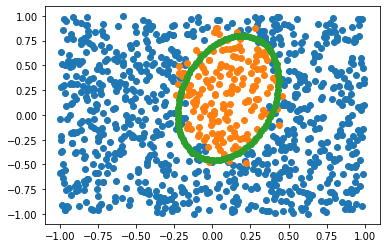

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# coefficients of the ellipse equation
a = theta[3]
b = theta[2]
c = theta[4]
d = theta[1]
e = theta[0]

# calculate the center of the ellipse
x_center = -b / (2 * a)
y_center = -d / (2 * c)

# diagonalize the matrix A
A = np.array([[a, c/2], [c/2, b]])
eigenvalues, eigenvectors = np.linalg.eig(A)

# get the lengths of the major and minor axes
a_length = np.sqrt(np.abs(e/eigenvalues[0]))
b_length = np.sqrt(np.abs(e/eigenvalues[1]))

# calculate the angle between the major axis and the x-axis
phi = np.arctan2(eigenvectors[1,0], eigenvectors[0,0])

# generate points on the ellipse
t = np.linspace(0, 2*np.pi, 100)
xy = np.stack((a_length * np.cos(t), b_length * np.sin(t)), axis=1)

# rotate the points by the angle phi
R = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
xy = np.matmul(xy, R)

# translate the points to the center of the ellipse

# plot the ellipse
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(xy[:,0] + x_center, xy[:,1] + y_center)
plt.show()


# Regresja logistyczna – realny problem
Spróbujmy zastosować wcześniejszy algorytm znajdowania modelu liniowego dla zadania regresji logistycznej do rzeczywistego, poznanego już wcześniej zbioru danych mnist. 

Na początek, spróbujmy rozróżnić cyfrę '0' od pozostałych cyfr.
Wczytajmy najpierw zbiór danych i podzielmy go na część treningową i testową.

In [ ]:
mnist_train_dataset = np.genfromtxt('/content/sample_data/mnist_train_small.csv', delimiter=',')
mnist_test_dataset = np.genfromtxt('/content/sample_data/mnist_test.csv', delimiter=',')
X_train = mnist_train_dataset[:, 1:]
y_train = mnist_train_dataset[:, 0].astype(int)
X_test = mnist_test_dataset[:, 1:]
y_test = mnist_test_dataset[:, 0].astype(int)

Znormalizujmy nasz zbiór danych, żeby wartości każdego piksela miały oczekiwaną średnią wartość 0 i odchylenie standardowe 1:

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

Uruchommy nasz algorytm regresji liniowej na zadaniu rozpoznawaniu '0' od innych cyfr na obrazku:

Cost after iteration 0: 0.6931471805599467
Cost after iteration 100: 0.20540767650527925
Cost after iteration 200: 0.15074161533965705
Cost after iteration 300: 0.12610545580993476
Cost after iteration 400: 0.11174393464086839
Cost after iteration 500: 0.10208966483062279
Cost after iteration 600: 0.09501326406006949
Cost after iteration 700: 0.08952273535135805
Cost after iteration 800: 0.08509003504432917
Cost after iteration 900: 0.08140590047860469


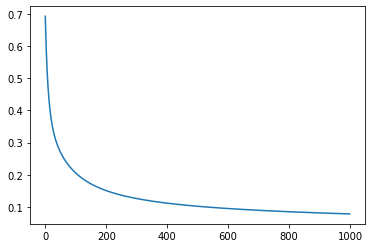

In [ ]:
theta, losses = logistic_regression_gd(X_train, y_train == 0, learning_rate=0.001)
plt.plot(losses)
plt.show()

Spróbujmy zwizualizować wagi naszego klasyfikatora.
Jak myślisz, dlaczego dostaliśmy taki kształt?

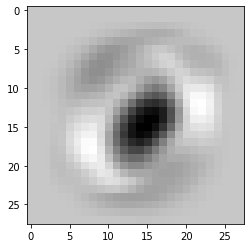

In [ ]:
plt.imshow(theta[1:].reshape(28, 28))
plt.show()

# Klasyfikacja liniowa dla wielu klas – softmax regression, multinomal logistic regression

Nic nie stoi na przeszkodzie, żeby użyć podobnego schematu, do klasyfikacji naszego zbioru danych na więcej niż jedną klasę.

Spróbujemy użyć podobnego schematu jak w przypadku regresji logistycznej, z drobnymi modyfikacjami: nasza funkcja liniowa będzie mapować z rozmiaru wejścia do rozmiaru będącym liczbą możliwych klas, na końcu użyjemy nieco innej funkcji normalizacyjnej, która będzie nam normalizować punkty (score'y) na poszczególnych klasach do dystrybucji nad tymi klasami: $softmax(x_1, \ldots, x_n) = (\frac{exp(x_i)}{exp(x_1) + \ldots + exp(x_n)})_i$.

Nadal będziemy jako funkcji celu używać entropii skośnej, jako miary odległości pomiędzy rozkładami:
$H(p,q) = -\sum_{i=1}^np(x_i)\log {q(x_i)} = -\sum_{i=1}^np(x_i)\log {p(x_i)}-\sum_{i=1}^np(x_i)\log {\frac{q(x_i)}{p(x_i)}}$

In [ ]:
def multinomial_logistic_regression_gd(X, y, learning_rate=0.01, num_iterations=1000, logging_period=100):
    """
    Performs gradient descent based logistic regression on the input data.
    
    Parameters:
    X (ndarray): A NumPy array of shape (n_samples, n_features) representing the input features.
    y (ndarray): A NumPy array of shape (n_samples,) representing the target variable.
    learning_rate (float): The learning rate for gradient descent. Default is 0.01.
    num_iterations (int): The number of iterations for gradient descent. Default is 1000.
    
    Returns:
    theta (ndarray): A NumPy array of shape (n_features+1,) representing the learned parameters (including bias term).
    """
    losses = []

    # Define the softmax function
    def softmax(x):
        return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

    # Define the cost function
    def cost_function(theta, X, y):
        y_pred = softmax(X.dot(theta))
        J = -np.mean(np.log(y_pred[np.arange(len(y)), y]))
        return J

    # Define the gradient function
    def gradient(theta, X, y):
        y_pred = softmax(X.dot(theta))

        # Calculate the error
        error = y_pred - np.eye(num_classes)[y]
        
        # Calculate the gradient
        grad = np.dot(X.T, error)
        return grad

    # Add bias term to X
    X = np.insert(X, 0, 1, axis=1)
    
    # Define the number of features and classes
    num_features = X.shape[1]
    num_classes = np.max(y) + 1

    # Initialize the weights
    theta = np.zeros((num_features, num_classes))
    
    # Perform gradient descent
    for i in range(num_iterations):
        cost = cost_function(theta, X, y)
        grad = gradient(theta, X, y)
        theta = theta - learning_rate * grad
        losses.append(cost)
        if i % logging_period == 0:
            print(f"Cost after iteration {i}: {cost}")

    return theta, losses

Cost after iteration 0: 2.3025850929940455
Cost after iteration 10: 0.8298711038771427
Cost after iteration 20: 0.4662018061039056
Cost after iteration 30: 0.37235670643132635
Cost after iteration 40: 0.33639645361297227
Cost after iteration 50: 0.32379520889465363
Cost after iteration 60: 0.3152630755844945
Cost after iteration 70: 0.3085841809124707
Cost after iteration 80: 0.3030746640706221
Cost after iteration 90: 0.2983907279633636
Cost after iteration 100: 0.2943249534757326
Cost after iteration 110: 0.29074025069121223
Cost after iteration 120: 0.2875405829801524
Cost after iteration 130: 0.28465574890857115
Cost after iteration 140: 0.2820327612178562
Cost after iteration 150: 0.27963063017064244
Cost after iteration 160: 0.2774170162898051
Cost after iteration 170: 0.27536598206344287
Cost after iteration 180: 0.2734564298227489
Cost after iteration 190: 0.2716709871855081


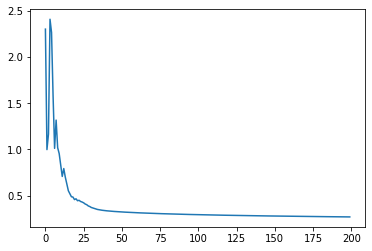

In [ ]:
theta, losses = multinomial_logistic_regression_gd(X_train, y_train, learning_rate=0.00001, num_iterations=200, logging_period=10)
plt.plot(losses)
plt.show()

0


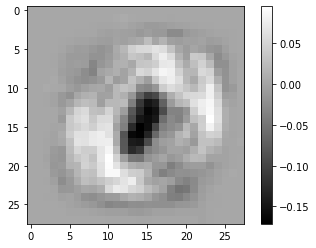

1


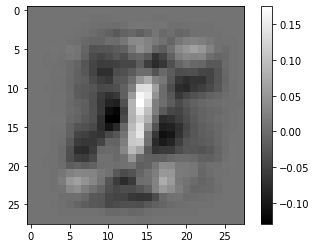

2


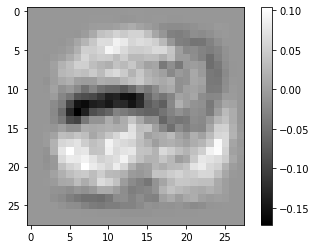

3


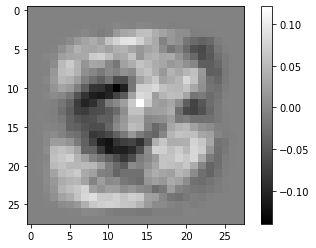

4


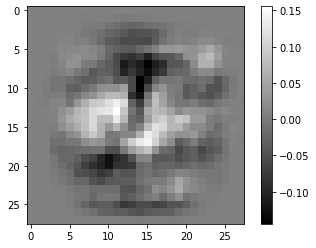

5


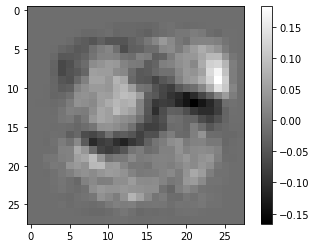

6


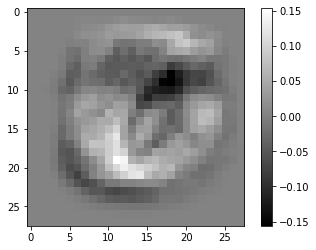

7


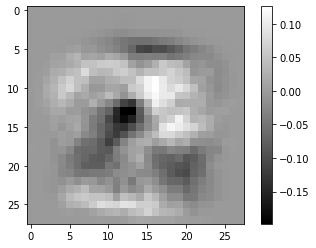

8


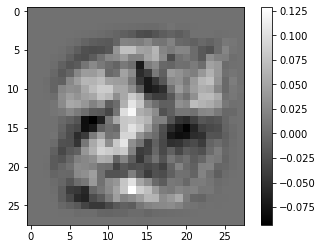

9


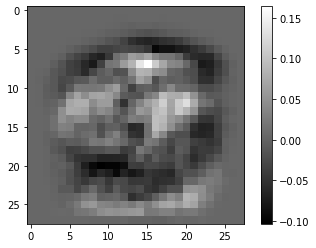

In [ ]:
for i in range(10):
  print(i)
  plt.imshow(theta[1:, i].reshape(28, 28))
  plt.colorbar()
  plt.show()

# Framework torch
Automatyczną kalkulacją gradientów zajmuje się framework pytorch.
Zadanie: proszę przepisać chociażby jeden z przykładów używając tego frameworku

# Framework sklearn
Klasyczne algorytmu MLowe, w tym algorytmy regresji poznane dzisiaj są poimplementowane w paczce sklearn.

Proszę z jej pomocą zreimplementować chociażby jeden dzisiejszych przykładów.